In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk

In [2]:
train_data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Documents\CODSOFT\train_data.txt", delimiter=':::', header=None, names=['Title', 'Genre', 'Description'], engine='python')
test_data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Documents\CODSOFT\test_data.txt", delimiter=':::', header=None, names=['id', 'Title', 'Description'], engine='python')
test_data_sol=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Documents\CODSOFT\test_data_solution.txt", delimiter=':::', header=None, names=['Title', 'Genre', 'Description'], engine='python')

In [3]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_data.head()

,id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
train_data.shape

(54214, 3)

In [7]:
test_data.shape

(54200, 3)

In [9]:
train_data = train_data.loc[train_data.index.isin(test_data.index)]


In [10]:
test_data = test_data.loc[test_data.index.isin(train_data.index)]


In [11]:
train_data.shape

(54199, 3)

In [12]:
test_data.shape

(54199, 3)

In [13]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [14]:
test_data.isnull().sum()

id             0
Title          0
Description    0
dtype: int64

In [15]:
train_data.duplicated().any()

False

In [16]:
train_data['Genre'].value_counts()

 drama           13611
 documentary     13093
 comedy           7444
 short            5072
 horror           2203
 thriller         1591
 action           1315
 western          1031
 reality-tv        884
 family            783
 adventure         775
 music             730
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           322
 mystery           319
 musical           277
 biography         265
 history           242
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

<AxesSubplot:>

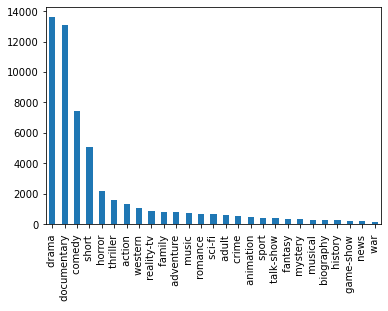

In [17]:
#Visualize the Data
# Check the Genre Category counts
train_data['Genre'].value_counts().plot(kind='bar')

# Data cleaning

In [19]:
train_data['Description'] = train_data['Description'].str.lower().copy()
test_data['Description'] = test_data['Description'].str.lower().copy()

In [20]:
train_data_clean = train_data.copy()
test_data_clean = test_data.copy()

In [21]:
def charactersAlone(x):
    x = re.sub(r"[^a-zA-Z+']", ' ', x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(charactersAlone)
test_data_clean['Description'] = test_data_clean['Description'].apply(charactersAlone)
train_data_clean


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the film's title refers not only to the un re...
...,...,...,...
54195,Beauty Parlor (1997),short,the story revolves around three women and a t...
54196,Segregating the Greatest Generation (2006),documentary,in this concept essay documentary parti...
54197,Vulture Canyon (????),drama,vulture canyon is the only juvenile girls pri...
54198,The Burglar (2016),drama,alex a young woman aged lives with her m...


In [22]:
test_data_clean

,id,Title,Description
1,2,La guerra de papá (1977),spain march quico is a very naughty ch...
2,3,Off the Beaten Track (2010),one year in the life of albin and his family ...
3,4,Meu Amigo Hindu (2015),his father has died he hasn't spoken with hi...
4,5,Er nu zhai (1955),before he was known internationally as a mart...
5,6,Riddle Room (2016),emily burns is being held captive in a room w...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",covering multiple genres tales of light da...
54196,54197,Der letzte Mohikaner (1965),as alice and cora munro attempt to find their...
54197,54198,Oliver Twink (2007),a movie years in the making oliver twist...
54198,54199,Slipstream (1973),popular but mysterious rock d j mike mallard...


In [23]:
import string
string.punctuation
def avoidPunctuation(x):
    x = "".join([i for i in x if i not in string.punctuation])
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(avoidPunctuation)
test_data_clean['Description'] = test_data_clean['Description'].apply(avoidPunctuation)
train_data_clean


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the films title refers not only to the un rec...
...,...,...,...
54195,Beauty Parlor (1997),short,the story revolves around three women and a t...
54196,Segregating the Greatest Generation (2006),documentary,in this concept essay documentary parti...
54197,Vulture Canyon (????),drama,vulture canyon is the only juvenile girls pri...
54198,The Burglar (2016),drama,alex a young woman aged lives with her m...


In [24]:
test_data_clean

,id,Title,Description
1,2,La guerra de papá (1977),spain march quico is a very naughty ch...
2,3,Off the Beaten Track (2010),one year in the life of albin and his family ...
3,4,Meu Amigo Hindu (2015),his father has died he hasnt spoken with his...
4,5,Er nu zhai (1955),before he was known internationally as a mart...
5,6,Riddle Room (2016),emily burns is being held captive in a room w...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",covering multiple genres tales of light da...
54196,54197,Der letzte Mohikaner (1965),as alice and cora munro attempt to find their...
54197,54198,Oliver Twink (2007),a movie years in the making oliver twist...
54198,54199,Slipstream (1973),popular but mysterious rock d j mike mallard...


In [26]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens
train_data_clean['Description'] = train_data_clean['Description'].apply(lambda x : tokenize(x))
test_data_clean['Description'] = test_data_clean['Description'].apply(lambda x : tokenize(x))
train_data_clean


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,"[, listening, in, to, a, conversation, between..."
2,Cupid (1997),thriller,"[, a, brother, and, sister, with, a, past, inc..."
3,"Young, Wild and Wonderful (1980)",adult,"[, as, the, bus, empties, the, students, for, ..."
4,The Secret Sin (1915),drama,"[, to, help, their, unemployed, father, make, ..."
5,The Unrecovered (2007),drama,"[, the, films, title, refers, not, only, to, t..."
...,...,...,...
54195,Beauty Parlor (1997),short,"[, the, story, revolves, around, three, women,..."
54196,Segregating the Greatest Generation (2006),documentary,"[, in, this, concept, essay, documentary, part..."
54197,Vulture Canyon (????),drama,"[, vulture, canyon, is, the, only, juvenile, g..."
54198,The Burglar (2016),drama,"[, alex, a, young, woman, aged, lives, with, h..."


In [27]:
test_data_clean

,id,Title,Description
1,2,La guerra de papá (1977),"[, spain, march, quico, is, a, very, naughty, ..."
2,3,Off the Beaten Track (2010),"[, one, year, in, the, life, of, albin, and, h..."
3,4,Meu Amigo Hindu (2015),"[, his, father, has, died, he, hasnt, spoken, ..."
4,5,Er nu zhai (1955),"[, before, he, was, known, internationally, as..."
5,6,Riddle Room (2016),"[, emily, burns, is, being, held, captive, in,..."
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","[, covering, multiple, genres, tales, of, ligh..."
54196,54197,Der letzte Mohikaner (1965),"[, as, alice, and, cora, munro, attempt, to, f..."
54197,54198,Oliver Twink (2007),"[, a, movie, years, in, the, making, oliver, t..."
54198,54199,Slipstream (1973),"[, popular, but, mysterious, rock, d, j, mike,..."


In [28]:
from nltk.corpus import stopwords
# Removing Stop Words
stopwords = nltk.corpus.stopwords.words("english")
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text
train_data_clean['Description'] = train_data_clean['Description'].apply(lambda x : remove_stopwords(x))
test_data_clean['Description'] = test_data_clean['Description'].apply(lambda x : remove_stopwords(x))
train_data_clean


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,"[, listening, conversation, doctor, parents, y..."
2,Cupid (1997),thriller,"[, brother, sister, past, incestuous, relation..."
3,"Young, Wild and Wonderful (1980)",adult,"[, bus, empties, students, field, trip, museum..."
4,The Secret Sin (1915),drama,"[, help, unemployed, father, make, ends, meet,..."
5,The Unrecovered (2007),drama,"[, films, title, refers, un, recovered, bodies..."
...,...,...,...
54195,Beauty Parlor (1997),short,"[, story, revolves, around, three, women, tran..."
54196,Segregating the Greatest Generation (2006),documentary,"[, concept, essay, documentary, participants, ..."
54197,Vulture Canyon (????),drama,"[, vulture, canyon, juvenile, girls, prison, a..."
54198,The Burglar (2016),drama,"[, alex, young, woman, aged, lives, mother, ar..."


In [29]:
test_data_clean

,id,Title,Description
1,2,La guerra de papá (1977),"[, spain, march, quico, naughty, child, three,..."
2,3,Off the Beaten Track (2010),"[, one, year, life, albin, family, shepherds, ..."
3,4,Meu Amigo Hindu (2015),"[, father, died, hasnt, spoken, brother, years..."
4,5,Er nu zhai (1955),"[, known, internationally, martial, arts, supe..."
5,6,Riddle Room (2016),"[, emily, burns, held, captive, room, idea, go..."
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","[, covering, multiple, genres, tales, light, d..."
54196,54197,Der letzte Mohikaner (1965),"[, alice, cora, munro, attempt, find, father, ..."
54197,54198,Oliver Twink (2007),"[, movie, years, making, oliver, twist, artful..."
54198,54199,Slipstream (1973),"[, popular, mysterious, rock, j, mike, mallard..."


Lemmatization

In [30]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
from nltk.corpus import wordnet

In [32]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
lem = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [lem.lemmatize(word) for word in tokenized_text]
    text=' '.join(text)
    return text
train_data_clean['lemmatized'] = train_data_clean['Description'].apply(lambda x : lemmatizing(x))
test_data_clean['lemmatized'] = test_data_clean['Description'].apply(lambda x : lemmatizing(x))
train_data_clean


,Title,Genre,Description,lemmatized
1,Oscar et la dame rose (2009),drama,"[, listening, conversation, doctor, parents, y...",listening conversation doctor parent year old...
2,Cupid (1997),thriller,"[, brother, sister, past, incestuous, relation...",brother sister past incestuous relationship c...
3,"Young, Wild and Wonderful (1980)",adult,"[, bus, empties, students, field, trip, museum...",bus empty student field trip museum natural h...
4,The Secret Sin (1915),drama,"[, help, unemployed, father, make, ends, meet,...",help unemployed father make end meet edith tw...
5,The Unrecovered (2007),drama,"[, films, title, refers, un, recovered, bodies...",film title refers un recovered body ground ze...
...,...,...,...,...
54195,Beauty Parlor (1997),short,"[, story, revolves, around, three, women, tran...",story revolves around three woman transvestit...
54196,Segregating the Greatest Generation (2006),documentary,"[, concept, essay, documentary, participants, ...",concept essay documentary participant age int...
54197,Vulture Canyon (????),drama,"[, vulture, canyon, juvenile, girls, prison, a...",vulture canyon juvenile girl prison arizona f...
54198,The Burglar (2016),drama,"[, alex, young, woman, aged, lives, mother, ar...",alex young woman aged life mother arad small ...


In [34]:
test_data_clean

,id,Title,Description,lemmatized
1,2,La guerra de papá (1977),"[, spain, march, quico, naughty, child, three,...",spain march quico naughty child three belongi...
2,3,Off the Beaten Track (2010),"[, one, year, life, albin, family, shepherds, ...",one year life albin family shepherd north tra...
3,4,Meu Amigo Hindu (2015),"[, father, died, hasnt, spoken, brother, years...",father died hasnt spoken brother year serious...
4,5,Er nu zhai (1955),"[, known, internationally, martial, arts, supe...",known internationally martial art superstar b...
5,6,Riddle Room (2016),"[, emily, burns, held, captive, room, idea, go...",emily burn held captive room idea got determi...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","[, covering, multiple, genres, tales, light, d...",covering multiple genre tale light dark antho...
54196,54197,Der letzte Mohikaner (1965),"[, alice, cora, munro, attempt, find, father, ...",alice cora munro attempt find father british ...
54197,54198,Oliver Twink (2007),"[, movie, years, making, oliver, twist, artful...",movie year making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"[, popular, mysterious, rock, j, mike, mallard...",popular mysterious rock j mike mallard askew ...


TFIDF Vectorization

In [35]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data_clean['lemmatized'])
X_test = tfidf_vectorizer.fit_transform(train_data_clean['lemmatized'])

Splitting data

In [36]:
x=X_train

In [37]:
y = y_train=train_data_clean['Genre']

In [38]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg=LogisticRegression(random_state=42)

In [43]:
lg.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [44]:
y_pred = lg.predict(X_val)

In [45]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred, zero_division=0.0))

Validation Accuracy: 0.5866236162361623
               precision    recall  f1-score   support

      action        0.56      0.27      0.36       243
       adult        0.85      0.22      0.35       106
   adventure        0.36      0.09      0.14       137
   animation        0.71      0.06      0.11        81
   biography        0.00      0.00      0.00        59
      comedy        0.54      0.58      0.56      1536
       crime        0.33      0.01      0.02       105
 documentary        0.66      0.86      0.75      2635
       drama        0.54      0.81      0.65      2735
      family        0.79      0.07      0.14       148
     fantasy        0.00      0.00      0.00        76
   game-show        0.83      0.37      0.51        41
     history        0.00      0.00      0.00        49
      horror        0.66      0.55      0.60       440
       music        0.63      0.39      0.48       124
     musical        1.00      0.02      0.03        59
     mystery        0.00

# Predict genres for test data

In [46]:
predicted_genres = lg.predict(X_test)

In [47]:
# Add predicted genres to test data
test_data['predicted_genre'] = predicted_genres


In [48]:
test_data

,id,Title,Description,predicted_genre
1,2,La guerra de papá (1977),"spain, march 1964: quico is a very naughty ch...",drama
2,3,Off the Beaten Track (2010),one year in the life of albin and his family ...,drama
3,4,Meu Amigo Hindu (2015),"his father has died, he hasn't spoken with hi...",short
4,5,Er nu zhai (1955),before he was known internationally as a mart...,drama
5,6,Riddle Room (2016),emily burns is being held captive in a room w...,documentary
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","covering multiple genres, tales of light & da...",drama
54196,54197,Der letzte Mohikaner (1965),as alice and cora munro attempt to find their...,documentary
54197,54198,Oliver Twink (2007),a movie 169 years in the making. oliver twist...,drama
54198,54199,Slipstream (1973),"popular, but mysterious rock d.j mike mallard...",drama


<AxesSubplot:>

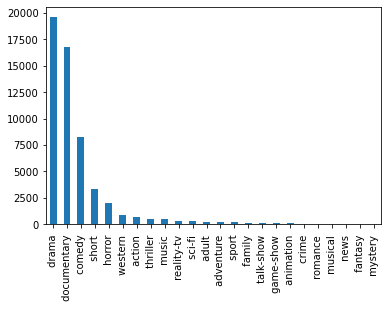

In [49]:
test_data['predicted_genre'].value_counts().plot(kind='bar')